In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [51]:
import pathlib
import  numpy as np
data_dir= pathlib.Path("dog_breeds/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['dachshund' 'golden_retriever' 'husky' 'labrador']


In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape:{img.shape}")
    return img

['images (354).jpeg']
Image shape:(100, 100, 3)


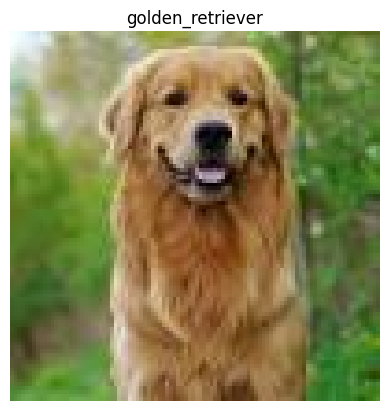

In [72]:
img = view_random_image(target_dir="dog_breeds/train/",target_class="golden_retriever")

['images (194).jpeg']
Image shape:(183, 275, 3)


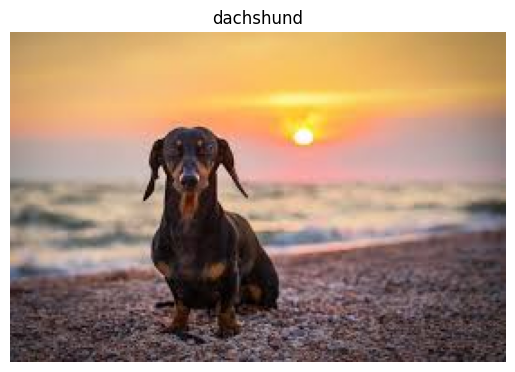

In [73]:
img = view_random_image(target_dir="dog_breeds/train/",target_class="dachshund")

['images (318).jpeg']
Image shape:(225, 225, 3)


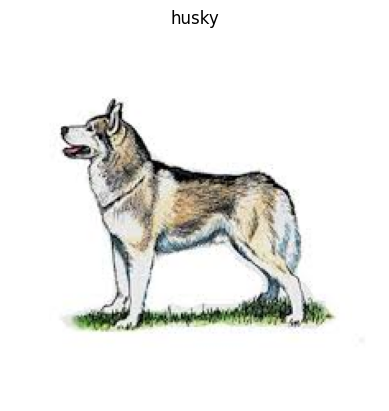

In [74]:
img = view_random_image(target_dir="dog_breeds/train/",target_class="husky")

['images (28).jpeg']
Image shape:(183, 275, 3)


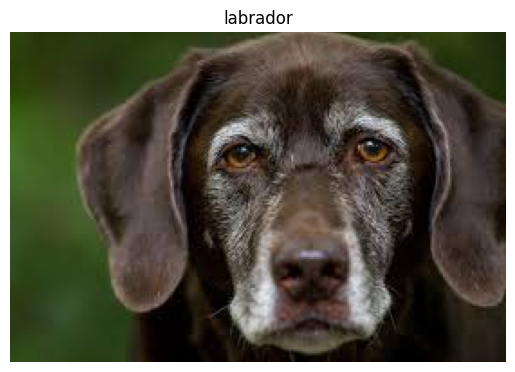

In [75]:
img = view_random_image(target_dir="dog_breeds/train/",target_class="labrador")

In [76]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential



In [77]:
# plot validation and training curves seperately
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

In [78]:
train_dir ="dog_breeds/train/"
test_dir = "dog_breeds/test/"


In [79]:
# Create ImageDataGenerator training instance with data augmentation

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20, 
                                            shear_range=0.2, 
                                            zoom_range=0.2, 
                                            width_shift_range=0.2, 
                                            height_shift_range=0.2, 
                                            horizontal_flip=True) 


train_datagen = ImageDataGenerator(rescale=1/255.) 


test_datagen = ImageDataGenerator(rescale=1/255.)

In [80]:
print("Augmented training images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 3173 images belonging to 4 classes.
Non-augmented training images:
Found 3173 images belonging to 4 classes.
Unchanged test images:
Found 754 images belonging to 4 classes.


In [81]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

In [82]:
def load_and_prep_image(filename,img_shape=224):
    img= tf.io.read_file(filename)
    img= tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255.
    return img

In [85]:
cnn_model = Sequential(
    [
        Conv2D(64,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(64,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(64,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Conv2D(64,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Conv2D(64,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(4,activation="softmax")

    ]
)
cnn_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=Adam(),metrics=["accuracy"])


In [105]:
history_7 = cnn_model.fit(train_data_augmented_shuffled,epochs=10,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
100/100 [==============================] - 37s 363ms/step - loss: 1.0564 - accuracy: 0.5581 - val_loss: 1.3622 - val_accuracy: 0.3926
Epoch 2/10
100/100 [==============================] - 35s 351ms/step - loss: 0.9778 - accuracy: 0.5840 - val_loss: 1.4128 - val_accuracy: 0.3873
Epoch 3/10
100/100 [==============================] - 35s 352ms/step - loss: 0.9998 - accuracy: 0.5875 - val_loss: 1.5625 - val_accuracy: 0.3939
Epoch 4/10
100/100 [==============================] - 35s 348ms/step - loss: 0.9567 - accuracy: 0.5988 - val_loss: 1.6392 - val_accuracy: 0.4005
Epoch 5/10
100/100 [==============================] - 35s 350ms/step - loss: 0.9068 - accuracy: 0.6215 - val_loss: 1.7526 - val_accuracy: 0.4045
Epoch 6/10
100/100 [==============================] - 35s 349ms/step - loss: 0.8897 - accuracy: 0.6300 - val_loss: 1.6391 - val_accuracy: 0.4005
Epoch 7/10
100/100 [==============================] - 36s 355ms/step - loss: 0.8850 - accuracy: 0.6382 - val_loss: 1.6873 - val_ac

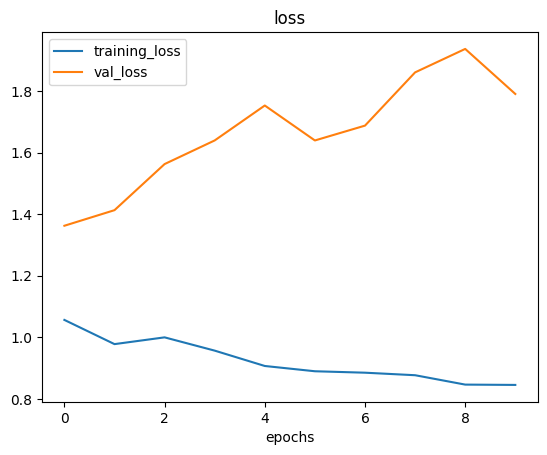

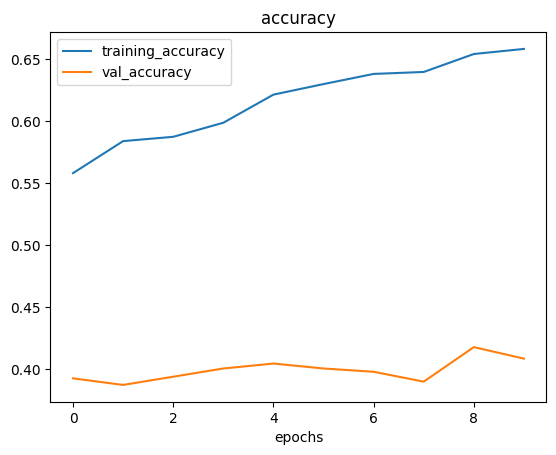

In [106]:
plot_loss_curves(history_7)

In [107]:
cnn_model.evaluate(test_data)

24/24 [==============================] - 10s 430ms/step - loss: 1.7901 - accuracy: 0.4085


[1.7901268005371094, 0.40848806500434875]

In [68]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("dog_breeds/test/").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            os.remove(img_p)

In [70]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("dog_breeds/train/").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            os.remove(img_p)

In [101]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    print(pred)
    confidence = tf.reduce_max(pred)
    second_confidence = tf.math.top_k(pred,2)[0][0][1]
    if len(pred[0])>1:
        pred_class= class_names[tf.argmax(pred[0])]
    else:
        pred_class= class_names[int(tf.round(pred[0]))]

    if confidence>0.5:
        plt.title(f"{pred_class} with {confidence*100:.2f}% confidence.")
    else:
        print(f"cross between {class_names[tf.argmax(pred[0])]} and {class_names[tf.math.top_k(pred,2)[1][0][1]]} with {confidence*100:.2f}% confidence.")
    # print(f"{pred_class} with {confidence*100:.2f}% confidence.")
    plt.imshow(img)
    plt.axis(False)

[[0.3601186  0.08458172 0.01517738 0.54012233]]


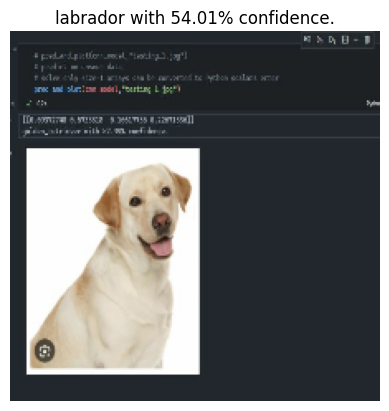

In [111]:
# pred_and_plot(cnn_model,"testing_1.jpg")
# predict on unseen data
# solve only size-1 arrays can be converted to Python scalars error
pred_and_plot(cnn_model,"testing_1.jpg")

[[0.02777167 0.03817058 0.9102577  0.02380004]]


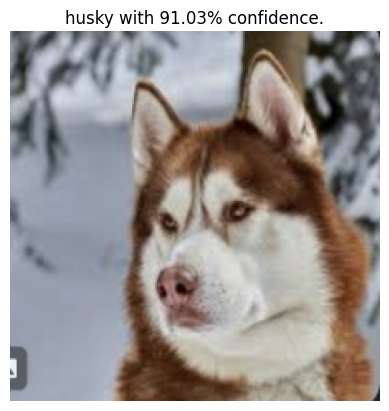

In [110]:
pred_and_plot(cnn_model,"testing_husky.jpg")

[[0.0685057  0.33386806 0.20187898 0.39574727]]
cross between labrador and golden_retriever with 39.57% confidence.


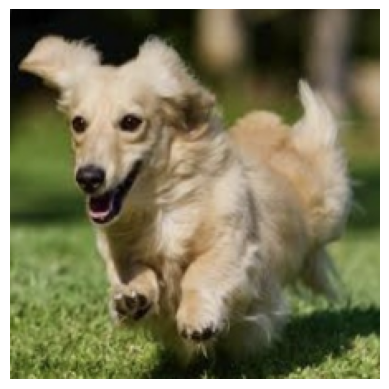

In [109]:
pred_and_plot(cnn_model,"dachshund_test.jpg")

In [47]:
# write a function to predict and plt images also print the confidence rate for each prediction
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    confidence = tf.reduce_max(pred)
    print(pred)
    if len(pred[0])>1:
        pred_class= class_names[tf.argmax(pred[0])]
    else:
        pred_class= class_names[int(tf.round(pred[0]))]


    print(f"{pred_class} with {confidence*100:.2f}% confidence.")
    plt.imshow(img)
    plt.axis(False)

# pred_and_plot(cnn_model,"testing_1.jpg")

In [22]:
cnn_model.save("dog_breed_model")

INFO:tensorflow:Assets written to: dog_breed_model\assets


In [6]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("dog_breed_model")
loaded_model.evaluate(test_data)

18/18 [==============================] - 14s 259ms/step - loss: 1.1727 - accuracy: 0.5235


[1.172682285308838, 0.5234656929969788]

In [48]:
# loaded_model.predict("testing_1.jpg")
# predict output for testing_1 image using saved model
pred_and_plot(loaded_model,"dachshund_test.jpg")

NameError: name 'loaded_model' is not defined

In [115]:
# function to predict and plot images present in a folder 
def pred_and_plot_all(model,folder_path,class_names=class_names):
    path = Path(folder_path).rglob("*.jpg")
    # traverse through all the files
    for img_p in path:
        try:
            img = PIL.Image.open(img_p)
        except PIL.UnidentifiedImageError:
                print(img_p)
        img = load_and_prep_image(img_p)
        pred = model.predict(tf.expand_dims(img,axis=0))
        confidence = tf.reduce_max(pred)
        if len(pred[0])>1:
            pred_class= class_names[tf.argmax(pred[0])]
        else:
            pred_class= class_names[int(tf.round(pred[0]))]
        print(f"{pred_class} with {confidence*100:.2f}% confidence.")
        plt.imshow(img)
        plt.axis(False)

[[0.3995736  0.01938411 0.19532327 0.38571903]]
cross between dachshund and labrador with 39.96% confidence.


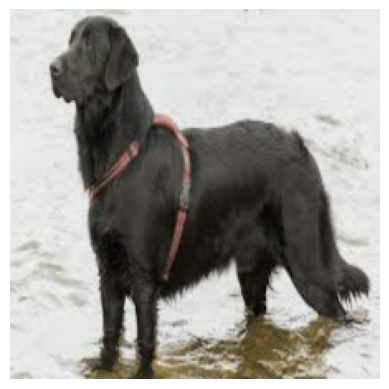

In [127]:
pred_and_plot(cnn_model,"testing_maryam/file_9.jpg")  
# pred_and_plot(cnn_model,"testing_maryam/file_7.jpg")  